# Visualizing Hipparcos catalog using Python libraries


In this notebook, we will create a famous <b>HR diagram</b> using data collected by the <b>Hipparcos satellite</b>.

The Hertzsprung-Russell (HR) diagram shows how the <b> absolute stellar magnitude </b> or brightness (<b>Mv</b>) changes with the stellar temperature (color index B-V, or spectral type). This is considered to be one of the most famous graphs in astronomy. 

The absolute magnitudes can be calculated if we know the distance to each star. The Hipparcos satellite has measured parallaxes (<b>p</b>)  in milliarcseconds for the stellar objects.  We can derive distances (<b>D</b>) using formula $D=1/p$, where p is parallax in arcseconds, and D is the distance in parsecs (pc). A parsec is a unit usually used for measuring huge distances in astronomy ($1 pc \approx 3\times10^{13} km$). Then the absolute stellar magnitudes are calculated using the following formulas: $M= m+5-5\log{(D)}$, where D is in <i>pc</i>, or as $M=m+5-5\log{(1000/p)}$ where p is in <i>milliarcseconds</i>.

To visualize and explore HR diagram using Hipparcos data,  we will import the following set of columns from the hip_main.dat: 
<ul>
     <li> Hip_No -- unique Hipparcos number </li>
     <li> Vmag -- apparent visual magnitude </li>
     <li> Plx -- trigonometric parallax in milliarcseconds </li>
     <li> e_Plx -- standard error for the parallax</li>
     <li> B-V and V-I -- color indexes </li>
     <li> e_B-V and e_V-I -- standard errors for B-V and V-I indexes </li>
     <li> Var_period -- a period (in days) for variable stars
     <li> Var_type -- type of variability</li>
     <li> Spectral_type -- a spectral type of an object</li>
     <li> ccdm_h -- flag (HIM), indicating if a star has been identified as double or multiple system </li>
    
</ul>

### 1. Importing Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 2. Importing Hipparcos data 


In [2]:
file = '../data/hip_main.dat'

#list of the column names
new_column_names = ['Hip_No', 'Vmag', 'Plx', 'e_Plx', 'B-V', 'e_B-V', 'V-I', 'e_V-I', 'Var_period', 'Var_type', 'ccdm_h', 'Spectral_type']
Hip = pd.read_csv(file, header = None, sep ='|',
                usecols = [1,5,11,16,37,38,40,41,51,52,56,76], 
                names = new_column_names,  
                low_memory = False)
Hip.head()

,Hip_No,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,Var_period,Var_type,ccdm_h,Spectral_type
0,1,9.10,3.54,1.39,0.482,0.025,0.55,0.03,,,,F5
1,2,9.27,21.90,3.10,0.999,0.002,1.04,0.00,,C,,K3V
2,3,6.61,2.81,0.63,-0.019,0.004,0.00,0.00,,C,I,B9
3,4,8.06,7.75,0.97,0.370,0.009,0.43,0.01,,,,F0V
4,5,8.55,2.87,1.11,0.902,0.013,0.90,0.01,,,,G8III


### 3. Changing data types of the columns 

To perform numerical manipulations with the data frame, we will change the data type for the numerical columns using pd.to_numeric(). By default, the columns are of the object (string) type. The info shows that the Hip data frame has 118218 rows and 12 columns. We can also notice that some columns have missing values.

In [3]:
col_list = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'e_B-V', 'V-I', 'e_V-I', 'Var_period']

for  col in col_list:
    Hip[col] = pd.to_numeric(Hip[col],  errors = 'coerce')
    
Hip.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Hip_No         118218 non-null  int64  
 1   Vmag           118217 non-null  float64
 2   Plx            117955 non-null  float64
 3   e_Plx          117955 non-null  float64
 4   B-V            116937 non-null  float64
 5   e_B-V          116937 non-null  float64
 6   V-I            116943 non-null  float64
 7   e_V-I          116943 non-null  float64
 8   Var_period     2541 non-null    float64
 9   Var_type       118218 non-null  object 
 10  ccdm_h         118218 non-null  object 
 11  Spectral_type  118218 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 10.8+ MB


### 4. Calculating the absolute stellar magnitudes

In [4]:
def find_absolute_mag(df):
    invalid_values = np.seterr(invalid='ignore')
    df['Mv'] = df['Vmag'] + 5 - 5*np.log10(1000/df['Plx'])

### 5. Plotting the first version of the HR diagram

First, we will create the HR diagram for all objects listed in the Hipparcos catalog.   

In [5]:
def HR_plot(col_x, col_y, x_start, x_end, y_start, y_end, clr):
    x = col_x
    y = col_y
    plt.plot(x, y, marker='.', linestyle='none', markersize=2, color=clr)
    plt.xlim(x_start,x_end)
    plt.ylim(y_start,y_end)
    plt.xlabel('B-V')
    plt.ylabel('Mv')
    plt.title('Hipparcos Hertzsprung-Russell Diagram')

In [6]:
find_absolute_mag(Hip)
Hip.tail()

,Hip_No,Vmag,Plx,e_Plx,B-V,e_B-V,V-I,e_V-I,Var_period,Var_type,ccdm_h,Spectral_type,Mv
118213,118318,6.99,1.92,0.91,1.595,0.013,1.61,0.01,NaN,M,,K2,-1.593494
118214,118319,8.23,10.63,1.17,0.639,0.015,0.70,0.01,NaN,C,,G2V,3.362666
118215,118320,7.59,5.00,1.01,0.999,0.012,0.98,0.01,NaN,C,,K0,1.084850
118216,118321,9.20,19.22,1.00,0.698,0.003,0.75,0.00,NaN,,,G5V,5.618767
118217,118322,4.49,8.71,0.57,-0.075,0.011,-0.04,0.02,NaN,,,B9IV,-0.809909


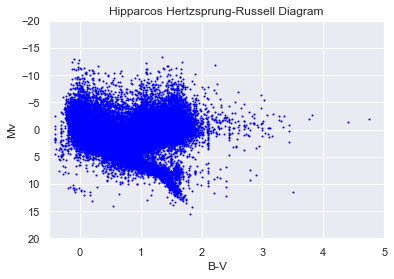

In [7]:
#plotting HR diagram    
HR_plot(Hip['B-V'], Hip['Mv'], -0.5, 5, 20, -20, 'blue')    

### 6. Filtering data

The HR diagram above displays all data, including points with significant errors in measurements.
We can reduce scattering by selecting only single stars and excluding double and multiple systems.  
We also need to take into account errors in the measurements for the parallaxes and color indexes. Stars with large uncertainties in Plx, Vmag, and B-V can be filtered out from the data set.  

In [8]:
#selecting single stars with no ccdm_h flag 
Hip = Hip.loc[Hip['ccdm_h']==' ']

#selecting stars with the relative errors in parallax: e_Plx/abs(Plx) < 10 %
Hip = Hip.loc[(Hip['e_Plx']/Hip['Plx'].abs())<0.10]
Hip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17236 entries, 6 to 118217
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hip_No         17236 non-null  int64  
 1   Vmag           17236 non-null  float64
 2   Plx            17236 non-null  float64
 3   e_Plx          17236 non-null  float64
 4   B-V            17206 non-null  float64
 5   e_B-V          17206 non-null  float64
 6   V-I            17206 non-null  float64
 7   e_V-I          17206 non-null  float64
 8   Var_period     220 non-null    float64
 9   Var_type       17236 non-null  object 
 10  ccdm_h         17236 non-null  object 
 11  Spectral_type  17236 non-null  object 
 12  Mv             17236 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### 7. Plotting the new HR diagram

The new HR diagram displays 17 236 stars, including the main sequence stars, white dwarf objects (below the main sequence), and a group of giant stars (above the main sequence). 

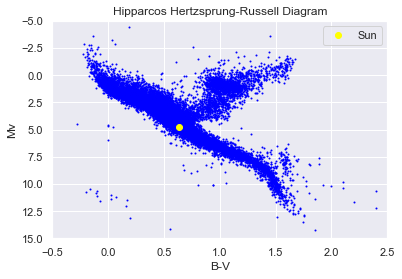

In [9]:
HR_plot(Hip['B-V'], Hip['Mv'], -0.5, 2.5, 15,-5, 'blue')

#Sun position at 0.63, 4.8
yellow_dot = plt.plot(0.63,4.8, marker='o', color='yellow', linestyle='none')
plt.legend(yellow_dot, ['Sun'])

### 8. Change in absolute stellar magnitude with the color index (B-V) 

The colors on the plot do not represent the real stellar colors accurately, instead, they display a change in the B-V index, from the cool-red objects to the blue-hot stars. 

Text(0.5, 1.0, 'HR diagram')

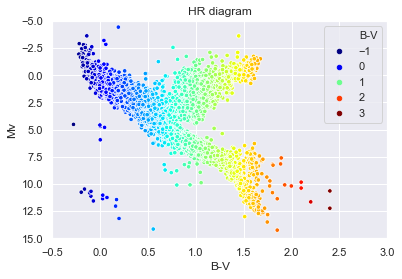

In [10]:
sns.scatterplot(x ='B-V', y ='Mv', data = Hip, hue ='B-V', size ='B-V', sizes = (20,20), palette='jet')

plt.ylim(15,-5)
plt.xlim(-0.5,3.0)
plt.title('HR diagram')